# 평가(Evaluation)

- 성능 평가 지표(Evalution Metric)은 분류 & 회귀 모델에 따라 여러 종류로 나뉨.
- 회귀 : 실제값과 예측값의 오차 평균값에 기반
- 분류 : 실제값과 예측값의 정확도와 오류정도에 기반

### 분류에 사용되는 평가지표
    - 정확도(Accuracy)
    - 오차행렬(Confusion Matrix)
    - 정밀도(Precision)
    - 재현율(Recall)
    - F1 Score
    - ROC AUC

# 정확도(Accuracy)

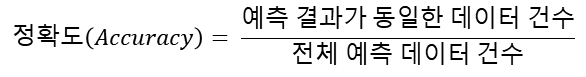

모델 예측 성능을 직관적으로 나타내는 평가 지표.

In [19]:
# MNIST Data Set을 이용한 예제.
# 레이블 값(0~9) 중 값이 7인 것만 True, 나머지는 False로 변환하는 이진 분류로 변환.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np


class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
    
# MNIST Data Loading
digits = load_digits()


# digits 가 7이면 True이며 astype(int) 1로 반환. 아니면 False이며 0을 반환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [6]:
# 불균형 레이블 데이터 분포 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1 분포도')
print(pd.Series(y_test).value_counts())


# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


# 
# 
# 

# 오차행렬(Confusion Matrix)

- 이진 분류 성능 지표로 잘 활용.
- 이진 분류 예측 오류와 더불어 기타 유형의 예측 오류 발생도 측정.

- 왼쪽, 오른쪽 : 예측된 클래스 값 기준
- 위, 아래 : 실제 클래스 값 기준
- True / False는 예측값과 실제값이 같은가 / 틀린가 를 의미.
- Positve / Negative는 예측 결과값이 부정 / 긍정 을 의미.

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

# TN = 405    FP = 0
# FN = 45     TP = 0

# 이러한 불균형한 레이블의 경우 일반적으로 적은 수의 결과값에 Positive 1, 반대의 경우 Negative 0 값 부여.
# 때문에 ML알고리즘 수행 시 Positive보단 Negative로 예측했을 때 정확도가 높아지는 경향 발생.

# 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP) / (TN + FP + FN + TP)

array([[405,   0],
       [ 45,   0]], dtype=int64)

# 
# 
# 

# 정밀도 및 재현율

## 정밀도
#### 정밀도 = TP / (FP + TP)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터 비율.

## 재현율(Sensitivity or True Positive Rate)
#### 재현율 = TP / (FN + TP)
실제값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터 비율.


In [25]:
# 오차 행렬 및 정밀도, 재현율을 모두 구현
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))
    

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [26]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


c:\aip\python_workspace\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 
# 
# 

# 정밀도/ 재현율 트레이드오프

- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우
- 분류의 결정 임계값(Thredshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.
- 단, 언제까지나 보완적인 평가 지표이기 때문에 한 쪽을 강제로 높이면 한 쪽은 떨어진다.
- 이를 정밀도/재현율 트레이드오프 라고 부른다.

### 사이킷런 분류 알고리즘
    - 예측 데이터가 특정 레이블에 속하는지 계산하기 위해 개별 레이블별 결정 확률 우선 계산.
    - 예측 확률이 큰 레이블 값으로 예측 시작.
    - 일반적 이진 분류에선 임계값을 0.5로 설정하고, 이보다 크면 Positive, 작으면 Negative로 결정.
    - predict_proba() 사용하여 개별 데이터별로 예측 확률 측정.

In [28]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 : ', pred_proba.shape)
print('pred_proba array에서 앞 3개만 샘플로 추출 : \n', pred_proba[:3])


#에측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한 눈에 확인.
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 :  (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 : 
 [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


In [29]:
# predict() 는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서
# 정해진 임계값을 만족하는 ndarray의 컬럼 위치를 최종 예측 클래스로 결정.
# Binarizer 클래스 이용하면 구현 가능.

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]


# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반화.
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [32]:
# Binarizer의 threshold 설정값(분류 결정 임계값).
custom_threshold = 0.5


# Predict_proba() 반환값의 Positive 클래스 칼럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)


binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


In [33]:
# 여기서 분류 결정 임계값(threshold)를 낮추면 값이 변한다.
# Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


In [34]:
# 임계값을 낮추니 재현율 값 상승 및 정밀도 하락.
# threshold는 Positive 예측값을 결정하는 확률의 기준이기 때문.


# 임계값을 0.4 ~ 0.6 까지 0.05씩 증가시키며 평가지표 조사.
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    # thresholds list객체 내의 값을 차례대로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임계값 : ', custom_threshold)

        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033
임계값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869
임계값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541
임계값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


In [37]:
# 위의 코드는 임계값 변화에 따른 평가지표 측정법.
# 사이킷런에 이와 유사한 API 존재.
# precision_recall_curve()
    # y_ture : 실제 클래스값 배열
    # probas_pred : Positive Column의 예측 확률 배열
    # 반환 - 정밀도 / 재현율

from sklearn.metrics import precision_recall_curve


# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 


# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)


#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))


# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


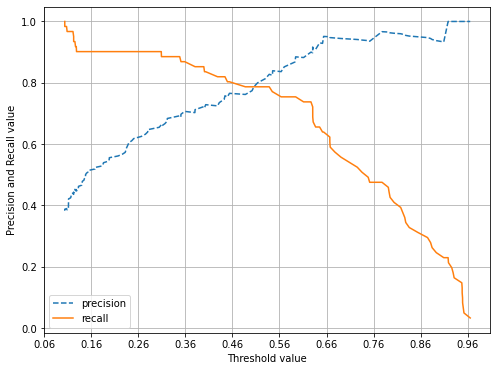

In [38]:
# 위에서 구한 정밀도 및 재현율을 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

정밀도(precision)은 점선으로, 재현율(recall)은 실선으로 표현.

임계값이 낮을수록 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아진다.

즉, 정밀도와 재현율의 수치가 상호 반대로 적용되기 때문에

단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용되어선 안된다.

# 
# 
# 

# F1 Score

정밀도와 재현율을 결합한 지표.

F1 Score는 정밀도와 재현율이 어느 한 쪽으로 치우지지 않았을 때 상대적으로 높은 값을 가진다.

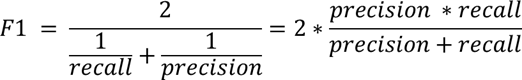

In [39]:
# 사이킷런 f1_socre() API 이용.
# 로지스틱 회귀 기반 타이타닉 생존자 모델 F1 Score 계산.

from sklearn.metrics import f1_score 

f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [40]:
# 타이타닉 생존자 예측에서 임계값 변화시키면서 F1 Score 포함한 평가 지표 계산.
# get_clf_eval() 함수에 F1 Score 로직 추가.
# 이후 앞에서 정의한 get_eval_by_threshold() 함수 이용.
# 임계값 04 ~ 0.6 별로 정확도, 정밀도, 재현율, F1 Score 측정.

def get_clf_eval(y_test , pred):
    
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


F1 Score는 임계값이 0.6일 때 가장 좋은 값 출력.

하지만 임계값 0.6일 때 재현율이 크게 감소했으므로 주의.

# 
# 
# 

# ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류 예측 성능 측정에 중요하게 사용되는 지표.

ROC(Receiver Operation Characteristic Curve, 수신자 판단 곡선)은

FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타낸 곡선.

FPR을 X축, TPR을 Y축으로 시각화.


### 민감도 및 특이성

민감도(TPR)는 실제값 Positive가 정확히 예측되어야 하는 수준.

특이성(TNR)은 실제값 Negative가 정확히 예측되어야 하는 수준.

FPR = FP / (FP + TN) = 1 - TNR(특이성)

In [42]:
# 사이킷런 roc_curve() 이용해 ROC곡선 생성.
    # y_true : 실제값
    # y_score : predict_proba()의 반환값
    # 반환 - FPR, TPR, thresholds
    
    
# 타이타닉 생존자 예측 모델의 FPR, TPR, thresholds 계산.    
# LogisticRegression 객체의 predict_proba() 결과 재사용.

from sklearn.metrics import roc_curve


# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 


fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))


# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


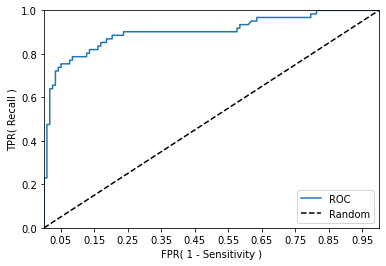

In [43]:
# ROC 곡선 시각화


def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

일반적으로 ROC곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용.

대신 AUC(ROC곡선 면적에 기반한 값)를 분류의 성능 지표로 사용.

AUC값은 ROC 곡선 밑의 면적을 구한 값으로 1에 가까울수록 좋은 수치.

직선에서 멀어지고 좌측상단 모서리에 가파를수록 직사각형에 가까운 값(1)이 됨.

직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5이다.

즉 AUC는 보통 0.5 이상의 값을 가진다.